2021/12/4

This code is for stitching divided ground truth imagees into original size.

Please check whether lines located at image boundary are correctly connected each other.

If not, you should conduct additional manual correction.

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [13]:
current_path=os.getcwd()
ground_truth_path=os.path.join(current_path, "ground_truth")
ground_truth_im=os.listdir(ground_truth_path)

GT_list=[]
height_list=[]
width_list=[]
for i in tqdm(range(len(ground_truth_im))):
    ground_truth_im_path=os.path.join(ground_truth_path, ground_truth_im[i])
    print(ground_truth_im_path)
    im=cv2.imread(ground_truth_im_path)
    height, width, _=im.shape
    GT_list.append(im)
    height_list.append(height)
    width_list.append(width)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 24.54it/s]

C:\Users\yusukekita\Documents\lab\plant_cell\2021\experiment\for_first_paper\20210923\ground_truth\GT_0_0.png
C:\Users\yusukekita\Documents\lab\plant_cell\2021\experiment\for_first_paper\20210923\ground_truth\GT_0_1.png
C:\Users\yusukekita\Documents\lab\plant_cell\2021\experiment\for_first_paper\20210923\ground_truth\GT_1_0.png
C:\Users\yusukekita\Documents\lab\plant_cell\2021\experiment\for_first_paper\20210923\ground_truth\GT_1_1.png


In [14]:
#create zero matrix for stitching all images
zero_mat=np.zeros((height_list[0]+height_list[1], width_list[0]+width_list[1], 3), np.uint8)

n=0
for i in range(2):
    for j in range(2):
        zero_mat[i*height_list[i]:(i+1)*height_list[i], j*width_list[j]:(j+1)*width_list[j], :]=GT_list[n]
        n+=1

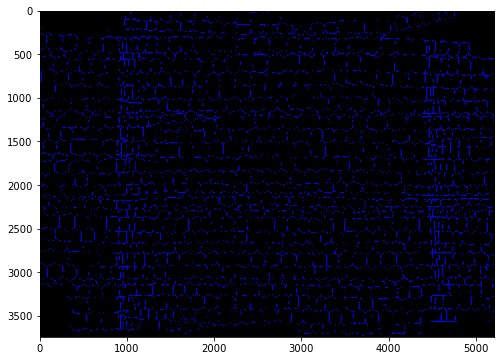

In [18]:
#show concatenation result
plt.figure(figsize=(12, 6))
plt.imshow(zero_mat)
plt.show()

In [24]:
#save ground truth image
boundary_image_tr=np.zeros((zero_mat.shape[0], zero_mat.shape[1], 4), np.uint8)
boundary_image_tr[:,:,:3] = zero_mat
boundary_image_tr[:,:,3] = np.where(np.all(boundary_image_tr == 0, axis=-1), 0, 255) 
cv2.imwrite(os.path.join(ground_truth_path, 'boundary_after_manual_correction.png'), boundary_image_tr)

True